_Main topics covered during today's session:_

This NB:

1. **Intro to SQL:**
    
    a. SQL clauses
    
    b. Joins
    
    c. How to write SQL queries and use sqlite3 in NB's
    
    d. DB Browser for SQLite
    
Next NB:

2. **Querying in SQL**
    
    a. Aggregate function overview
    
    b. SQL query to pandas dataframe
    
    c. String manipulations, in select and sorting/joining


# Intro to SQL

## We're going to do a high level introduction to SQL.

#### This is not intended to be a comprehensive introduction, but we instead will be covering topics that students have historically had issues with in the class.

### First, just a little bit about SQL and relational databases.

SQL stands for Structured Query language. It is generally pronounced "es-queue-el" or "see-kwell". SQL is the industry standard for communicating with relational databases.

And while the Web is a great source of "new" data, most real-world business data appears, arguably, in more traditional relational database systems. These databases are "tuned" for the task of managing tabular data (e.g. tibbles) with complex relationships.

Data is stored in tables, which is made up of rows and columns. Each row represents a different entity (of whatever is in that table) and each column represents a different attribute about that entity.

For a good visual, think of an Excel spreadsheet, with rows and columns.

#### So what do we do with relational databases?

Our task in relational database reporting is to take a requirement for information and translate that into a/an SQL query that returns the requested data.

1. Which tables do we need?

2. Which columns do we need?

3. How will we use the columns to get the information requested?

### What makes up an SQL query?

**SQL query clauses -- Order of appearance in the query**

There are 6 possible clauses in an SQL query.

They must appear in the query in the following order:

1. ***SELECT*** -- Which columns/data elements are to be included in the result set.


2. ***FROM*** -- The tables which are the source of the data to be returned


3. ***WHERE***
    
    a. The columns from different tables that are equivalent and define how the tables are joined together.
    
    b. Any filtering criteria for the query, to return a subset of the data. Note that this filtering is done PRIOR to any aggregations.


4. ***GROUP BY*** -- If aggregating, these are the columns that the aggregations are based on.


5. ***HAVING*** -- Filtering on data after aggregations have been performed.


6. ***ORDER BY*** -- Sorting the data.


There is a 7th clause, **which is not universal to all databases,** but it is available in SQLite. It is the **LIMIT** clause, which tells the database how many rows to return. It would be last in the order of the query, and would also execute last.

**SQL query clauses -- Order of execution**

The 6 clauses execute in the following order:

1. ***FROM*** -- Which tables are in scope for where the data will come from.


2. ***WHERE*** -- How are the tables related to each other (joins), and any filtering that is to be done. At the conclusion of this step, all of the detail rows that make up the dataset to be returned will be in memory. 
    
      a. The result set will include all eligible rows to be returned, from all tables. It does not include any aggregating or filtering of aggregates.
        
      b. The result set includes all of the columns in all of the tables at this point.


3. ***GROUP BY*** -- Perform any groupings that need to be done for the aggregations. Each grouping represents a separate entity at this point in the process. Remember "split-apply-combine" from the pandas groupby() function last week? This is the "split" step.


4. ***HAVING*** -- Filter the groupings from the last step, keeping only those that meet the criteria.


5. ***SELECT*** -- Choose only the columns that are required to be returned. Also perform and data manipulations (string manipulation, for example) that are required.


6. ***ORDER BY*** -- When the final set of rows to be returned remain, they are sorted in whatever order is specified.

### Now let's look at joins

Notebook 9, Part 0 contains the link to an outstanding resource for visualizing joins, which are typically represented by various Venn diagrams.

https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins

The joins we will deal with in this class are inner, outer, left and right (these are the same as the pandas merge "how" parameter", from last week).

Also, remember last week how we discussed the "left" and "right" tables? Well the same applies here. The first listed table is the "left" table and the second listed is the "right" table.

**Inner join**

This is the most common join, and the easiest to understand. The query using this join will return only the rows that are in both tables. 

Additionally, this is the default join in SQL, so if a join is not specified (as above), then the INNER JOIN is assumed.

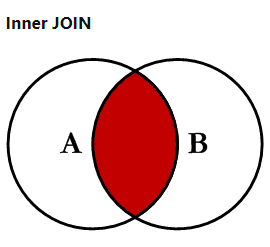

**Outer join**

This is also known as FULL OUTER JOIN or FULL JOIN. The query will return all of the rows from both tables, whether or not there is a match in the other table. All columns will be populated for the rows that have a match, and for those rows from either table that do not have a match, a NULL value will be returned for the non-matching columns.

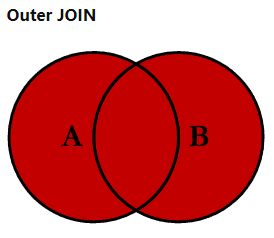

**Left join**

This join will return all of the rows from the left table, whether or not there is a match from the right table. Any records that match from the right table will also be included, and for those left table rows that do not have a match, the right table columns in the SELECT statement will return a NULL value.

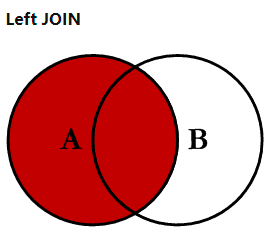

**Right join**

Opposite of the Left join.

This join will return all of the rows from the right table, whether or not there is a match from the left table. Any records that match from the left table will also be included, and for those right table rows that do not have a match, the left table columns in the SELECT statement will return a NULL value.

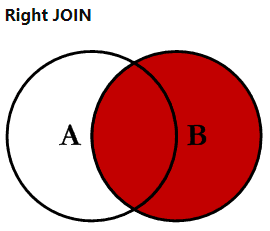

### Running SQL from Jupyter notebooks.

In general, there are three steps to running SQL queries:

1. Create a database connection. In this class, we will not ask you to create database connections for a grade. We will provide the database connections, and in most cases we will also provide queries that give you an initial view of the tables in the database.


2. Write the query. We encourage you to put the query into a string variable and then use the variable name in the query execution step.


3. Execute the query and return the results. You will (most always) return the results into a pandas dataframe, potentially for further manipulation.

In [ ]:
# create a connection to the database
import sqlite3 as db

# This is the example database, from Part 0 of NB 9.
# Connect to a database (or create one if it doesn't exist)
conn = db.connect('example.db')

We recommend using the three single quotes paradigm for strings in Python, allowing you to include any characters you need within the query, and not having to worry about escape characters.

We also recommend starting with some form of query template, as below.

Such a template separates (and organizes) the various clauses, allowing you to visually see and understand what you are doing.

In [ ]:
# showing query template
# note the we are putting the query string into the variable 'query'.

query = '''
SELECT

FROM

WHERE

GROUP BY

HAVING

ORDER BY

LIMIT

'''

In [ ]:
# example query
query1 = '''

SELECT * 

FROM Students

LIMIT 5

'''

In [ ]:
# execute the query
c = conn.cursor()
c.execute(query1)
results1 = c.fetchall()
results1

In [ ]:
# another query
# note the indentations and single line item paradigm
query2 = '''

SELECT Students.name, 
       Takes.grade

FROM Students, Takes

WHERE Students.gtid = Takes.gtid 
      AND Takes.course = 'CSE 6040'

'''


In [ ]:
# execute the query
c = conn.cursor()
c.execute(query2)
results2 = c.fetchall()
results2

#### Both of these queries use the curser object of the database connection to return a list of tuples, with each tuple being a "row" of data. This is not the normal method that we will ask you to bring back data, but we want you to be aware of this method. We will normally ask you to bring back the results to a pandas dataframe.

### DB Browser for SQLite

#### SQLite has a database IDE tool, DB Browser, which allows you to connect to the database and write queries directly.

While you may or may not find it useful in this class, it is a very good tool to use in other classes in this program. Most classes (with the exception of CSE 6242 -- DVA) that utilize databases use SQLite, so having this "tool in your toolbox" will be valuable to you in those classes.

If you want to use DB Browser in this class, you will need to download the notebook database from Vocareum, so that you can access it locally on your computer. Vocareum does not allow external tools, such as DB Browser, to access the databases stored on it.

You can download DB Browser from the following link: https://sqlitebrowser.org/

